# ClayPlotter Test Notebook

This notebook demonstrates the usage of the `ChoroplethPlotter` class to generate maps for USA states and Canadian provinces.

In [1]:
import logging
import pandas as pd
import matplotlib.pyplot as plt
from clayPlotter import ChoroplethPlotter # Import the main class

# Configure logging
logging.basicConfig(level=logging.DEBUG, format='%(asctime)s - %(name)s - %(levelname)s - %(message)s') # Set level to DEBUG

## 1. USA States - Admission Year

In [2]:
# --- Define Sample Data ---
admission_data = {
    'Alabama': 1819, 'Alaska': 1959, 'Arizona': 1912, 'Arkansas': 1836, 'California': 1850,
    'Colorado': 1876, 'Connecticut': 1788, 'Delaware': 1787, 'Florida': 1845, 'Georgia': 1788,
    'Hawaii': 1959, 'Idaho': 1890, 'Illinois': 1818, 'Indiana': 1816, 'Iowa': 1846,
    'Kansas': 1861, 'Kentucky': 1792, 'Louisiana': 1812, 'Maine': 1820, 'Maryland': 1788,
    'Massachusetts': 1788, 'Michigan': 1837, 'Minnesota': 1858, 'Mississippi': 1817,
    'Missouri': 1821, 'Montana': 1889, 'Nebraska': 1867, 'Nevada': 1864, 'New Hampshire': 1788,
    'New Jersey': 1787, 'New Mexico': 1912, 'New York': 1788, 'North Carolina': 1789,
    'North Dakota': 1889, 'Ohio': 1803, 'Oklahoma': 1907, 'Oregon': 1859, 'Pennsylvania': 1787,
    'Rhode Island': 1790, 'South Carolina': 1788, 'South Dakota': 1889, 'Tennessee': 1796,
    'Texas': 1845, 'Utah': 1896, 'Vermont': 1791, 'Virginia': 1788, 'Washington': 1889,
    'West Virginia': 1863, 'Wisconsin': 1848, 'Wyoming': 1890
}

# Convert to DataFrame
location_col_usa = 'State'
value_col_usa = 'Admission Year'
usa_df = pd.DataFrame(list(admission_data.items()), columns=[location_col_usa, value_col_usa])

print("USA Data:")
print(usa_df.head())

USA Data:
        State  Admission Year
0     Alabama            1819
1      Alaska            1959
2     Arizona            1912
3    Arkansas            1836
4  California            1850


2025-04-09 16:52:53,200 - INFO - Instantiating plotter for USA states...
2025-04-09 16:52:53,201 - INFO - Using cache directory: /home/clay/.cache/clayPlotter
2025-04-09 16:52:53,201 - INFO - Attempting to load plot configuration: usa_states.yaml
2025-04-09 16:52:53,207 - INFO - Successfully loaded plot configuration for key 'usa_states'
2025-04-09 16:52:53,207 - INFO - Generating USA plot...
2025-04-09 16:52:53,207 - INFO - Starting plot generation for geography key: 'usa_states'
2025-04-09 16:52:53,207 - INFO - Reading layer 'ne_50m_admin_1_states_provinces' for key 'usa_states' from /home/clay/.cache/clayPlotter/natural_earth_vector.gpkg
2025-04-09 16:52:53,293 - INFO - Successfully loaded layer 'ne_50m_admin_1_states_provinces' for key 'usa_states'
2025-04-09 16:52:53,302 - INFO - Filtering and potentially reprojecting main map area...
2025-04-09 16:52:53,303 - INFO - Filtered data to 51 features based on country_codes: ['US']
2025-04-09 16:52:53,304 - INFO - Filtered main map data

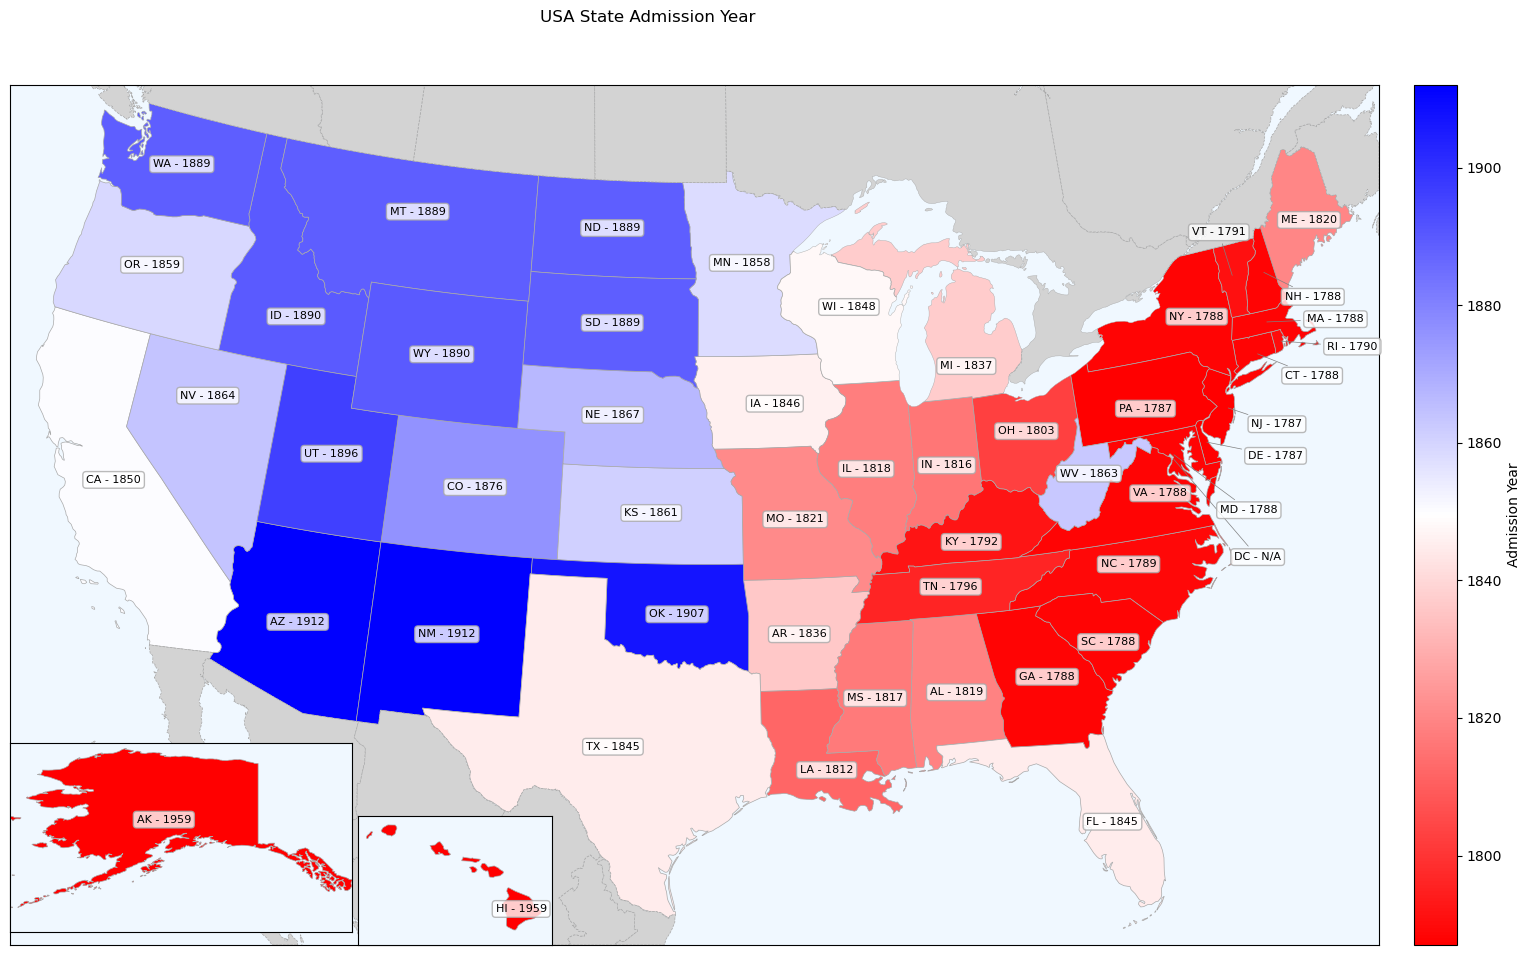

In [3]:
# --- Instantiate Plotter and Plot ---
try:
    logging.info("Instantiating plotter for USA states...")
    usa_plotter = ChoroplethPlotter(
        geography_key='usa_states',
        data=usa_df,
        location_col=location_col_usa,
        value_col=value_col_usa
    )

    logging.info("Generating USA plot...")
    # The plot method now handles data prep internally based on config
    # The default geo_join_column='name' in plot() should work if the shapefile has a 'name' column
    # If the shapefile uses a different column (like 'postal'), specify it: geo_join_column='postal'
    fig_usa, ax_usa = usa_plotter.plot(title="USA State Admission Year")

    # Save or show the plot
    output_filename_usa = "my_choropleth_map_usa.png"
    plt.savefig(output_filename_usa)
    logging.info(f"USA map saved to {output_filename_usa}")
    plt.show() # Display the plot in the notebook

except (ValueError, TypeError, FileNotFoundError, RuntimeError, KeyError) as e:
    logging.error(f"Failed to generate USA plot: {e}", exc_info=True)

## 2. Canadian Provinces - Confederation Year

In [4]:
# --- Define Sample Data ---
confederation_data = {
    'Ontario': 1867,
    'Québec': 1867, # Corrected spelling
    'Nova Scotia': 1867,
    'New Brunswick': 1867,
    'Manitoba': 1870,
    'British Columbia': 1871,
    'Prince Edward Island': 1873,
    'Saskatchewan': 1905,
    'Alberta': 1905,
    'Newfoundland and Labrador': 1949,
    'Yukon': 1898, # Territory
    'Northwest Territories': 1870, # Territory
    'Nunavut': 1999 # Territory
}

# Convert to DataFrame
location_col_can = 'Province/Territory'
value_col_can = 'Confederation Year'
can_df = pd.DataFrame(list(confederation_data.items()), columns=[location_col_can, value_col_can])

print("\nCanada Data:")
print(can_df.head())


Canada Data:
  Province/Territory  Confederation Year
0            Ontario                1867
1             Québec                1867
2        Nova Scotia                1867
3      New Brunswick                1867
4           Manitoba                1870


2025-04-09 16:52:54,298 - INFO - Instantiating plotter for Canadian provinces...
2025-04-09 16:52:54,298 - INFO - Using cache directory: /home/clay/.cache/clayPlotter
2025-04-09 16:52:54,298 - INFO - Attempting to load plot configuration: canada_provinces.yaml
2025-04-09 16:52:54,301 - INFO - Successfully loaded plot configuration for key 'canada_provinces'
2025-04-09 16:52:54,301 - INFO - Generating Canada plot...
2025-04-09 16:52:54,302 - INFO - Starting plot generation for geography key: 'canada_provinces'
2025-04-09 16:52:54,302 - INFO - Reading layer 'ne_50m_admin_1_states_provinces' for key 'canada_provinces' from /home/clay/.cache/clayPlotter/natural_earth_vector.gpkg
2025-04-09 16:52:54,366 - INFO - Successfully loaded layer 'ne_50m_admin_1_states_provinces' for key 'canada_provinces'
2025-04-09 16:52:54,371 - INFO - Filtering and potentially reprojecting main map area...
2025-04-09 16:52:54,372 - INFO - Filtered data to 13 features based on country_codes: ['CA']
2025-04-09 16:

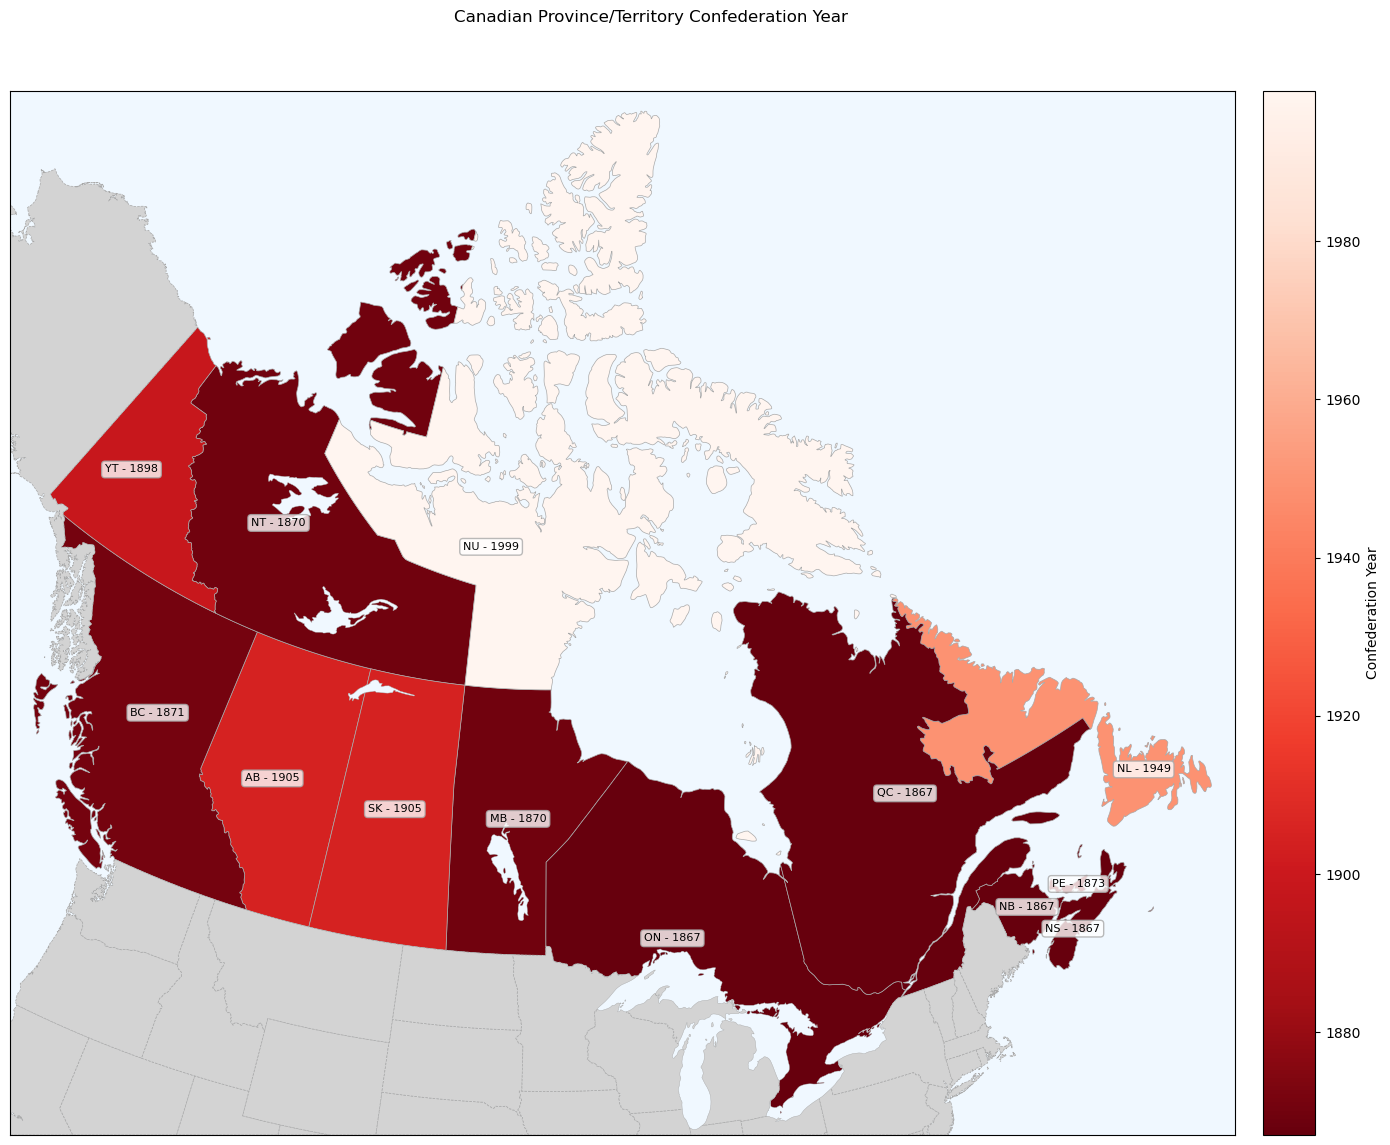

In [5]:
# --- Instantiate Plotter and Plot ---
try:
    logging.info("Instantiating plotter for Canadian provinces...")
    can_plotter = ChoroplethPlotter(
        geography_key='canada_provinces',
        data=can_df,
        location_col=location_col_can,
        value_col=value_col_can
    )

    logging.info("Generating Canada plot...")
    # Assuming the canada_provinces config and shapefile use 'name' for joining
    fig_can, ax_can = can_plotter.plot(title="Canadian Province/Territory Confederation Year")

    # Save or show the plot
    output_filename_can = "my_choropleth_map_canada.png"
    plt.savefig(output_filename_can)
    logging.info(f"Canada map saved to {output_filename_can}")
    plt.show() # Display the plot in the notebook

except (ValueError, TypeError, FileNotFoundError, RuntimeError, KeyError) as e:
    logging.error(f"Failed to generate Canada plot: {e}", exc_info=True)

In [6]:
print("\nNotebook finished.")


Notebook finished.
